# Homework Assignment 3

Bradley Freed

In [1]:
import pandas  as pd
import numpy as np

from  sklearn.preprocessing  import  MinMaxScaler
from  sklearn.model_selection  import  train_test_split
from  sklearn.metrics  import  mean_squared_error
from  sklearn.metrics  import  r2_score
from  sklearn.metrics  import  accuracy_score


filename = r"C:\Users\Brad\Downloads\AMZN.csv"
data = pd.read_csv(filename)

data_select = data[['Adj Close']]
values= data_select.values


## Problem 1(a

Transform the closing price data into time series data for 10 days.

In [2]:
def  series_to_supervised(data , n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list  else  data.shape[1]
    df = pd.DataFrame(data)
    cols , names = list(), list()
    # input  sequence (t-n, ... t-1)
    for i in  range(n_in , 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)'% (j+1, i)) for j in  range(n_vars)]
    # forecast  sequence (t, t+1, ... t+n)
    for i in  range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)'% (j+1)) for j in  range(n_vars)]
        else:
            names += [('var%d(t+%d)'% (j+1, i)) for j in  range(n_vars)]
    # put it all  together
    agg = pd.concat(cols , axis=1)
    agg.columns = names
    # drop  rows  with  NaN  values
    if  dropnan:
        agg.dropna(inplace=True)
    return  agg

In [3]:
# Send Adj Close values to series_to_supervised(). Returns time series data.
array = series_to_supervised(values,10)

print(array)

       var1(t-10)    var1(t-9)    var1(t-8)    var1(t-7)    var1(t-6)  \
10       1.958333     1.729167     1.708333     1.635417     1.427083   
11       1.729167     1.708333     1.635417     1.427083     1.395833   
12       1.708333     1.635417     1.427083     1.395833     1.500000   
13       1.635417     1.427083     1.395833     1.500000     1.583333   
14       1.427083     1.395833     1.500000     1.583333     1.531250   
...           ...          ...          ...          ...          ...   
5753  1676.609985  1785.000000  1689.150024  1807.839966  1830.000000   
5754  1785.000000  1689.150024  1807.839966  1830.000000  1880.930054   
5755  1689.150024  1807.839966  1830.000000  1880.930054  1846.089966   
5756  1807.839966  1830.000000  1880.930054  1846.089966  1902.829956   
5757  1830.000000  1880.930054  1846.089966  1902.829956  1940.099976   

        var1(t-5)    var1(t-4)    var1(t-3)    var1(t-2)    var1(t-1)  \
10       1.395833     1.500000     1.583333     1.

# Problem 1(b)
Scale the data with MinMaxScaler()

In [4]:

MMS = MinMaxScaler()
arrT = MMS.fit_transform(array)

arrT

array([[2.59357128e-04, 1.53693076e-04, 1.44087293e-04, ...,
        5.28325334e-05, 4.08251620e-05, 3.84236657e-05],
       [1.53693076e-04, 1.44087293e-04, 1.10466888e-04, ...,
        4.08251620e-05, 3.84236657e-05, 4.32266033e-05],
       [1.44087293e-04, 1.10466888e-04, 1.44087293e-05, ...,
        3.84236657e-05, 4.32266033e-05, 2.88177355e-05],
       ...,
       [7.78188587e-01, 8.32914067e-01, 8.43131601e-01, ...,
        9.00991491e-01, 8.75452055e-01, 9.04892242e-01],
       [8.32914067e-01, 8.43131601e-01, 8.66614396e-01, ...,
        8.75452055e-01, 9.04892242e-01, 8.98331029e-01],
       [8.43131601e-01, 8.66614396e-01, 8.50550352e-01, ...,
        9.04892242e-01, 8.98331029e-01, 8.78956280e-01]])

# Problem 1(c)
Use the Normal Equation Method to find the linear regression coefficients

In [6]:

X = arrT[:,0:10]
Y = arrT[:,10:11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

#add a constant 1 to X_train and X_test. Put it at the beginning. β0 will be at the beginning.

ones = np.ones((len(X_train),1))
X_train = np.append(ones,X_train,axis=1)

ones = np.ones((len(X_test),1))
X_test = np.append(ones,X_test,axis=1)

X_transpose = np.transpose(X_train)

# Calculating theta
# Normal Equation:
# theta = inv(X^T * X) * X^T * y
theta = np.linalg.inv(X_transpose.dot(X_train))
theta = theta.dot(X_transpose)
theta = theta.dot(y_train)

np.set_printoptions(precision=8,suppress=True)

print('The coefficients are :\n',theta)

The coefficients are :
 [[ 0.00012611]
 [-0.04833482]
 [ 0.22455881]
 [-0.15222874]
 [ 0.03289011]
 [-0.108812  ]
 [ 0.07175286]
 [-0.02607602]
 [-0.00148358]
 [ 0.08012983]
 [ 0.92804737]]


## Problem 1(d)
Make a prediction on my test set using the theta I found in the previous problem. 

In [7]:
wT = np.transpose(theta)

y_pred_norm = X_test.dot(theta)

y_pred_norm

print('MSE: ',mean_squared_error(y_test,y_pred_norm))

print("Rsq: ",r2_score(y_test,y_pred_norm))

MSE:  2.4148595608780825e-05
Rsq:  0.9995593086029824


## Problem 1(e)
Next,  find  the  coefficients using  gradient  descent  algorithm. Keep track of 

In [8]:
def predict(row, coefficients):
  yhat = coefficients[0]
  for i in range(len(row)):
    yhat = yhat + coefficients[i + 1] * row[i]
  return yhat

In [9]:
def coefficients_sgd(X_train, Y_train, l_rate, n_epoch):
  #initializing all coefficients to zero
  coef = [0.0 for i in range(len(X_train[0])+1)]
  for epoch in range(n_epoch):
    sum_error = 0
    for i in range(X_train.shape[0]):
      # calculating the prediction using current coeeficients
      yhat = predict(X_train[i,:], coef)
      # calculating error
      error = yhat - Y_train[i]
      sum_error += error**2
      #stochastic gradient descent
      coef[0] = coef[0] - l_rate * error
      for j in range(len(coef)-1):
        coef[j + 1] = coef[j + 1] - l_rate * error * X_train[i,j]
    print( ' >epoch=%d, lrate=%.3f, error=%.3f ' % (epoch, l_rate, sum_error))
  #returning the list of coefficients  

  return coef

In [10]:
l_rate = 0.01
n_epoch = 200

coef = coefficients_sgd(X_train[:,1:11], y_train, l_rate, n_epoch)

 >epoch=0, lrate=0.010, error=5.666 
 >epoch=1, lrate=0.010, error=0.453 
 >epoch=2, lrate=0.010, error=0.447 
 >epoch=3, lrate=0.010, error=0.442 
 >epoch=4, lrate=0.010, error=0.437 
 >epoch=5, lrate=0.010, error=0.432 
 >epoch=6, lrate=0.010, error=0.427 
 >epoch=7, lrate=0.010, error=0.422 
 >epoch=8, lrate=0.010, error=0.417 
 >epoch=9, lrate=0.010, error=0.413 
 >epoch=10, lrate=0.010, error=0.408 
 >epoch=11, lrate=0.010, error=0.404 
 >epoch=12, lrate=0.010, error=0.399 
 >epoch=13, lrate=0.010, error=0.395 
 >epoch=14, lrate=0.010, error=0.391 
 >epoch=15, lrate=0.010, error=0.387 
 >epoch=16, lrate=0.010, error=0.383 
 >epoch=17, lrate=0.010, error=0.379 
 >epoch=18, lrate=0.010, error=0.375 
 >epoch=19, lrate=0.010, error=0.371 
 >epoch=20, lrate=0.010, error=0.367 
 >epoch=21, lrate=0.010, error=0.364 
 >epoch=22, lrate=0.010, error=0.360 
 >epoch=23, lrate=0.010, error=0.357 
 >epoch=24, lrate=0.010, error=0.353 
 >epoch=25, lrate=0.010, error=0.350 
 >epoch=26, lrate=0.01

In [11]:
np.set_printoptions(precision=8,suppress=True)

np.concatenate(coef, axis=0 )

array([-0.00001577,  0.00571104,  0.00177837, -0.0268984 , -0.01280302,
       -0.00269069,  0.04673011,  0.09593432,  0.1690996 ,  0.28114747,
        0.43780402])

## Problem 1(f)

In [12]:
y_pred_sgd = X_test.dot(coef)


print('MSE: ',mean_squared_error(y_test,y_pred_sgd))

print("Rsq: ",r2_score(y_test,y_pred_sgd))

MSE:  3.536825552792772e-05
Rsq:  0.9993545593213291


In [13]:
print('Normal equation method has just barely better metrics than gradient descent.')

Normal equation method has just barely better metrics than gradient descent.


# Problem 2

In [14]:

from  sklearn.model_selection  import  train_test_split
from  sklearn.model_selection  import  GridSearchCV
from  sklearn.model_selection  import  RepeatedStratifiedKFold
from  sklearn.linear_model  import  Perceptron
from  sklearn.model_selection  import  cross_val_score


filename = r"C:\Users\Brad\Downloads\sonar.all-data.csv"
df = pd.read_csv(filename)

array = df.values

X = array[:,:-1]
Y = array[:,-1]



## Problem 2(a)
Split the data, define the model and set my RepeatedStratifiedKFold.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

model = Perceptron()

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=rskf, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.664 (0.119)


## Problem 2(b)
Set the alpha values for the grid. Then use GridSearchCV 

In [16]:
grid = dict()
grid['alpha'] = [0.0001, 0.001, 0.01, 0.1]

In [17]:
search = GridSearchCV(model, grid, scoring='accuracy', cv=rskf, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)

## Problem 2(c)
Report the best score and best parameter

In [18]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.664
Config: {'alpha': 0.0001}


## Problem 2(d)
Create the perceptron model and fit using the training data. Make predictions from X_test to Y_test and look at the accuracy

In [19]:
model = Perceptron(alpha=.0001)
model.fit(X_train,y_train)
print('Accuracy:',model.score(X_test,y_test))


Accuracy: 0.6507936507936508


# Problem 3

In [20]:
from  sklearn.neighbors  import  KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

filename = r"C:\Users\Brad\Downloads\sonar.all-data.csv"
df3 = pd.read_csv(filename)

array3 = df3.values

X3 = array[:,:-1]
Y3 = array[:,-1]

## Problem 3(a)
Split the data and test accuracy of KNN with n nearest neighbors equaling from 1 to 30.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

scores = {}
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = accuracy_score(y_pred, y_test)

## Problem 3(b)
plot the accuracies and choose the best value for k.

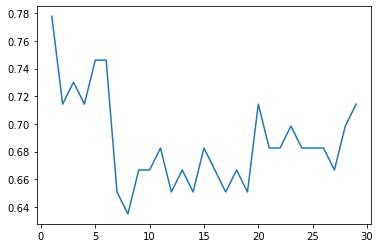

In [22]:
plt.plot(list(scores.keys()),list(scores.values()))


In [23]:
print("the best value for k appears to be 1.")

the best value for k appears to be 1.


## Problem 3(c)
Create the K nearest neighbor with the chosen value of k. Perform predictions on the test set and report accuracy.

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('The accuracy score of the model with n_neighbor = 1 is:',accuracy_score(y_pred, y_test))

The accuracy score of the model with n_neighbor = 1 is: 0.7777777777777778
